In [1]:
# Importing the necessary libraries and modules
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [2]:
# Fetching the California housing dataset
dataset = fetch_california_housing()

In [3]:
# Printing information about the dataset
print(dataset)  # Prints dataset details
print(dataset.DESCR)  # Prints a detailed description of the dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
# Creating a DataFrame using the dataset
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
# Adding the target variable to the DataFrame
df['Price'] = dataset.target

In [6]:
# Analyzing the basic statistics of the DataFrame
df.describe()  # Provides descriptive statistics of the dataset
df.isnull().sum()  # Counts the number of missing values in each column

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [7]:
# Creating a copy of the DataFrame for visualization
df_copy = df.sample(frac=0.25)

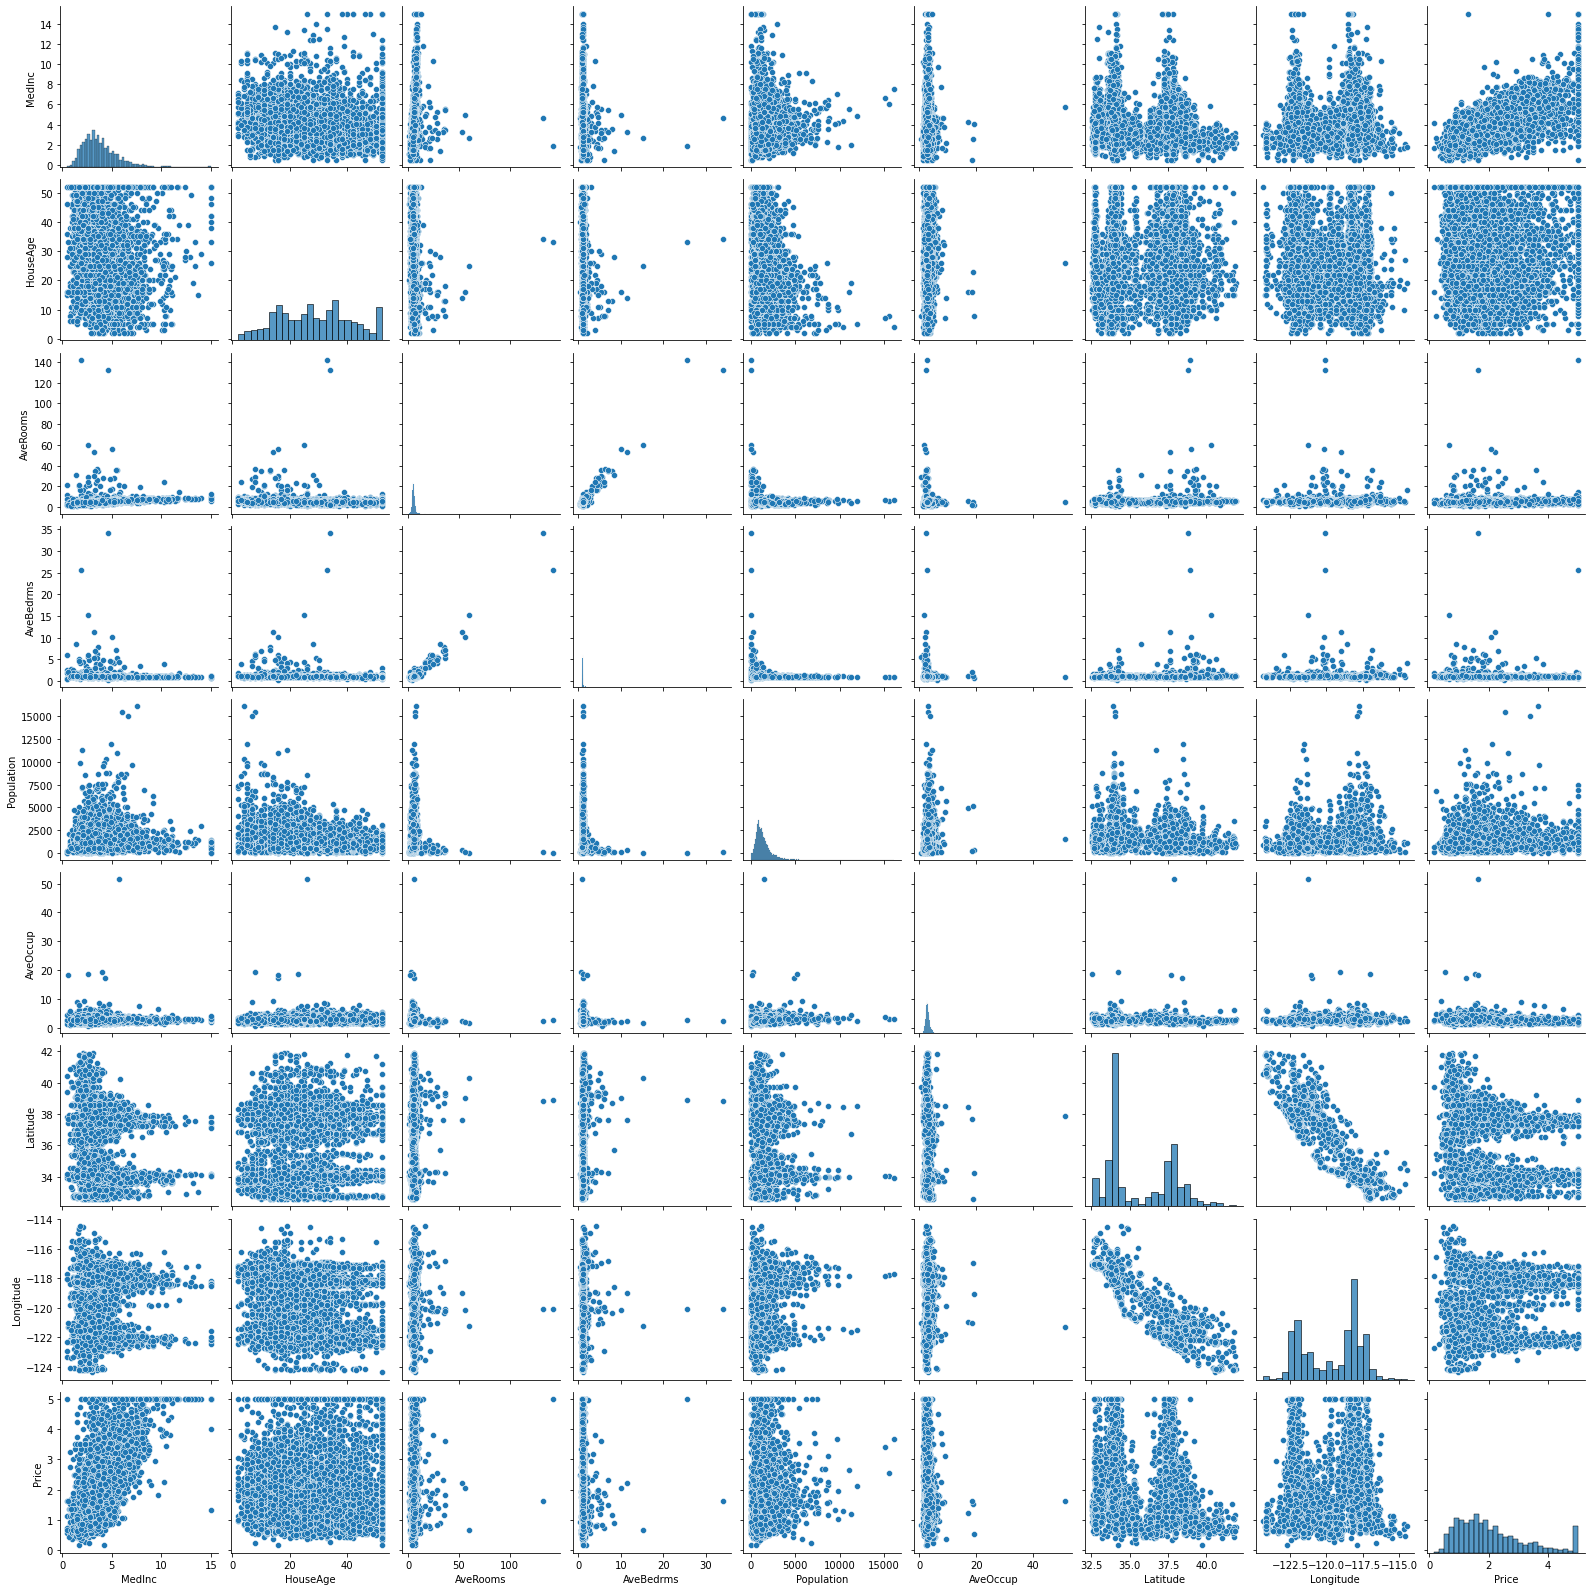

In [8]:
# Visualizing pairwise relationships between variables
sns.pairplot(df_copy)  # Generates scatter plots for each pair of variables

In [9]:
# Splitting the dataset into independent (features) and dependent (target) variables
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  # Target

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=36)

In [11]:
# Scaling the features using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)  # Scaling the training set
X_test = scaler.transform(X_test)  # Scaling the testing set

In [12]:
# Performing Linear Regression
regression = LinearRegression()
regression.fit(X_train, y_train)  # Training the model
y_pred = regression.predict(X_test)  # Making predictions

In [13]:
# Calculating evaluation metrics for Linear Regression
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

print(mse,mae,rmse)

0.5335029155157139 0.540898948179417 0.730412839095613


In [14]:
# Calculating the R-squared score
score = r2_score(y_test, y_pred)
score

0.5875394343499214

In [15]:
# Calculating the adjusted R-squared score
adjusted_r2 = 1 - (1 - score) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
print(adjusted_r2)
# Performing Ridge Regression
ridge = Ridge(alpha=20.0)  # Applying regularization with alpha=20
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

0.5873794961731389


In [16]:
# Calculating evaluation metrics for Ridge Regression
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_rmse = np.sqrt(ridge_mse)
print(ridge_mse,ridge_mae,ridge_rmse)

0.5335706984910803 0.5408065397594833 0.7304592380763489


In [17]:
# Performing Lasso Regression
lasso = Lasso(alpha=20.0)  # Applying regularization with alpha=20
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [18]:
# Calculating evaluation metrics for Lasso Regression
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = np.sqrt(lasso_mse)
print(lasso_mse,lasso_mae,lasso_rmse)

1.2935112672240048 0.9000629779192262 1.1373263679454568
